In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_base = pd.read_csv("agent_47_base/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration
count,202.0,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.0,100.500000,28.386139,0.396040,-60.396040,0.099007,0.254848
std,0.0,58.456537,23.237031,0.632128,63.212833,0.202918,0.207397
min,0.0,0.000000,2.000000,0.000000,-100.000000,0.000033,0.014755
25%,0.0,50.250000,8.000000,0.000000,-100.000000,0.000438,0.073457
50%,0.0,100.500000,23.000000,0.000000,-100.000000,0.005773,0.211284
75%,0.0,150.750000,44.000000,1.000000,0.000000,0.075983,0.394813
max,0.0,201.000000,122.000000,2.000000,100.000000,1.000000,1.122927


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration
0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration


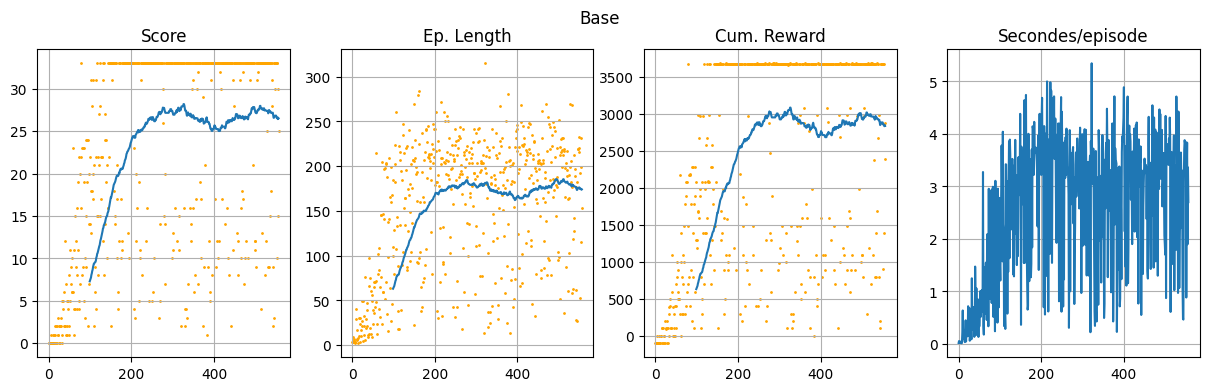

Total time: 1440.02
Max Score: 33 a 79
Max Cum. Reward: 3689.1 a 536


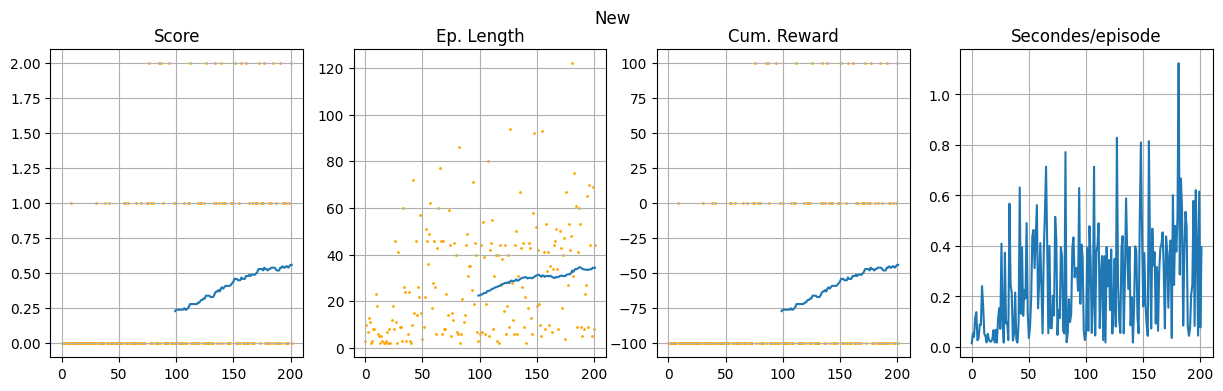

Total time: 51.48
Max Score: 2 a 76
Max Cum. Reward: 100.0 a 76


In [6]:
def graph(df, title, ROLLING=100):
    plt.figure(figsize=(15, 4))

    plt.subplot(141)
    plt.plot(df.Episode, df.Score.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.Score, s=1, color="orange")
    plt.title("Score")
    plt.grid()

    plt.subplot(142)
    plt.plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    plt.title("Ep. Length")
    plt.grid()

    plt.subplot(143)
    if False:
        plt.plot(df.Episode, df.Epsilon)
        plt.title("Epsilon")
    else:
        plt.plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
        plt.scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
        plt.title("Cum. Reward")
    plt.grid()

    plt.subplot(144)
    plt.plot(df.Episode, df.EpisodeDuration)
    plt.title("Secondes/episode")
    plt.grid()

    plt.suptitle(title)
    plt.show()

    runtime = df.EpisodeDuration.sum()
    print("Total time:", round(runtime, 2))
    print("Max Score:", df.Score.max(), "a", df.Score.argmax())
    print("Max Cum. Reward:", df.CumulativeReward.max().round(3), "a", df.CumulativeReward.argmax())
    print("Max Ep. Length:", df.EpisodeLength.max(), "a", df.EpisodeLength.argmax())

graph(df_base, "Base")
graph(df, "New")